<a href="https://colab.research.google.com/github/ankit15697/haberman-dataset-analysis/blob/master/haberman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#loading data set
# taking pandas data
df = pd.read_csv("/content/drive/My Drive/data-sets/haberman.csv", header = None, names = ["age", "treatment_year", "positive_nodes", "survival_status"])

#printing Data information
print (df.info)
print (df.dtypes)



<bound method DataFrame.info of      age  treatment_year  positive_nodes  survival_status
0     30              64               1                1
1     30              62               3                1
2     30              65               0                1
3     31              59               2                1
4     31              65               4                1
..   ...             ...             ...              ...
301   75              62               1                1
302   76              67               0                1
303   77              65               3                1
304   78              65               1                2
305   83              58               2                2

[306 rows x 4 columns]>
age                int64
treatment_year     int64
positive_nodes     int64
survival_status    int64
dtype: object


After taking data I came to know that in dataset there is no missing value and the data of death after 5 is not in categorical data.
I have to first convert this data into categorical data in format of 0 and 1

In [3]:
# converting data into categorical data form
df.survival_status = df.survival_status.map({1 : "YES", 2 : "NO"})
df.survival_status = df.survival_status.astype("category")


After converting survival status into categorical form.
My data is ready for analysis. I will further do analysis of this data.

In [4]:
# Prediction about result with the help of datadf

# printing count of YES and NO
print (df.iloc[:,-1].value_counts())

# printing percentage of YES and NO

print (df.iloc[:,-1].value_counts(normalize = True))

YES    225
NO      81
Name: survival_status, dtype: int64
YES    0.735294
NO     0.264706
Name: survival_status, dtype: float64


In this data set 73.52 percent patient will survive after having cancer and 26.47 percent patient will die after having cancer

In [5]:
# # Now plotting data into graph format

# #sns.set_style("whitegrid")
# sns.pairplot(df, hue="survival_status", size=4)
# plt.show()


**Doing Univariate Analysis**


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


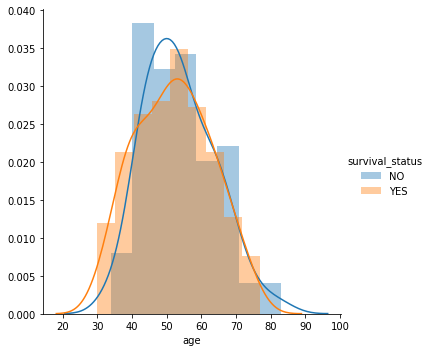

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


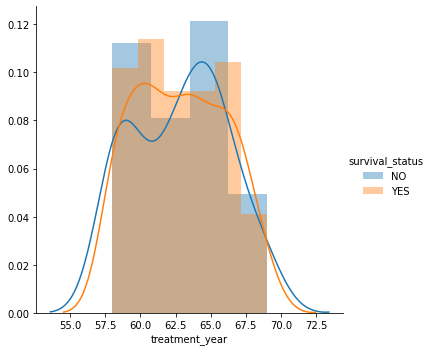

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


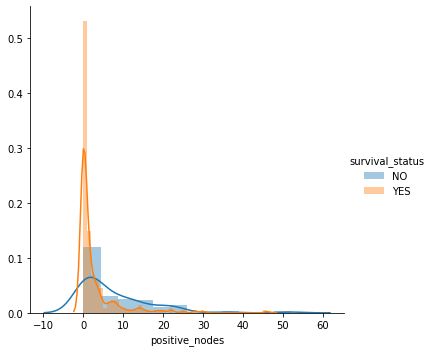

In [6]:
# Analysis for age
sns.FacetGrid(df, hue="survival_status", size=5).map(sns.distplot, "age").add_legend();
plt.show();

#analysis for teatment year
sns.FacetGrid(df, hue="survival_status", size=5).map(sns.distplot, "treatment_year").add_legend();
plt.show();

# analysis for total number of positive nodes
#analysis for teatment year
sns.FacetGrid(df, hue="survival_status", size=5).map(sns.distplot, "positive_nodes").add_legend();
plt.show();


**Observations from Univariate Analysis** : 
From univariate analysis it comes into picture that positive nodes matters for the result rest are overlapping
If positive nodes are greater than 5 then there are high chances that patient will die.

**cumulative distribution function (cdf)**
Now analysis by CDF
